# TP2 : Transmission sur fréquence porteuse QPSK

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [2]:
import commNumStartLT; from commNumStartLT import Mesure
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Modem
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Source
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Canal
importlib.reload(commNumStartLT)

<module 'commNumStartLT' from 'c:\\Users\\energ\\Code\\TP_RT3R05\\commNumStartLT.py'>

In [3]:
ip_destination = '192.168.1.100'  # Remplacez par votre adresse IP de destination
binary_packet = Source.icmp(ip_dest=ip_destination)
print("Séquence binaire du paquet ICMP :", binary_packet)


print("Séquence binaire aléatoire :", Source.random(32))


Séquence binaire du paquet ICMP : [  6   7   8   9  10  11   0   1   2   3   4   5   8   0  69   0   0  28
   0   1   0   0  64   1 247  42 192 168   1   1 192 168   1 100   8   0
 247 255   0   0   0   0]
Séquence binaire aléatoire : [1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1]


Mapping de la séquence binaire : [-1. -1. -3. -1.  1.  3.  1.  1. -1.  3.]
Le nombre de symboles est : 4
Le nombre de bits est : [0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]


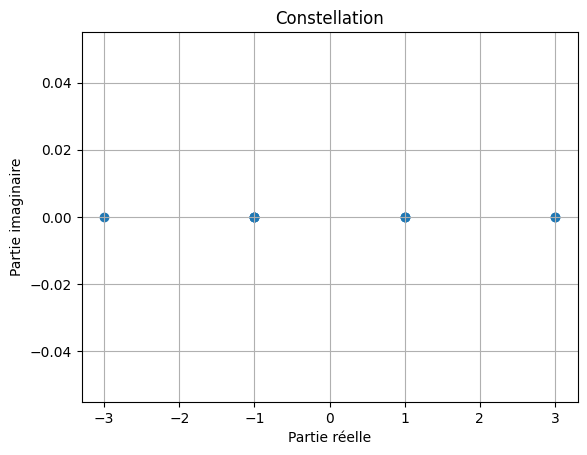

In [4]:
MyNemModem = Modem('PAM', 4, bits=Source.random(20))
MyMapp = MyNemModem.mapping(3)
print("Mapping de la séquence binaire :", MyMapp)
print("Le nombre de symboles est :", MyNemModem.nsymb)
print("Le nombre de bits est :", MyNemModem.bits)

# Affichage de la constellation

plt.figure()
plt.scatter(np.real(MyMapp), np.imag(MyMapp))
plt.title("Constellation")
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")
plt.grid()
plt.show()





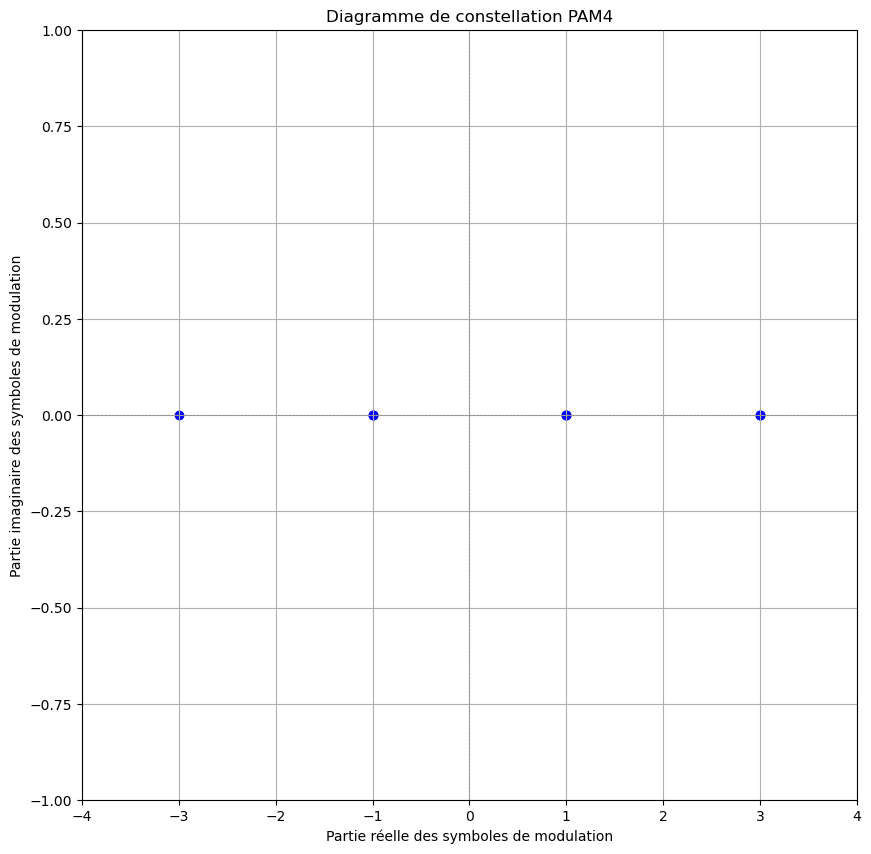

Mapping de la séquence binaire : [-1. -1. -3.  1.  1.  1.  3.  3. -1.  3.]
Le nombre de symboles est : 4
Le nombre de bits est : [0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1]


In [29]:
signal = np.sin(np.linspace(0, 2 * np.pi, 100))  # Signal sinusoïdal
mesure = Mesure(signal)

# Créer des symboles de modulation PAM4
MyNemModem = Modem('PAM', 4, bits=Source.random(20))
MyMapp = MyNemModem.mapping(3)  # Obtenir les symboles modulés

# Afficher le diagramme de constellation
mesure.plot_constellation(symbols=MyMapp, window_size=10, title="Diagramme de constellation PAM4")

# Afficher les informations de mapping et le nombre de symboles/bits
print("Mapping de la séquence binaire :", MyMapp)
print("Le nombre de symboles est :", MyNemModem.nsymb)
print("Le nombre de bits est :", MyNemModem.bits)

Séquence binaire aléatoire : [0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1]
Mapping de la séquence binaire : [-3.  3. -1.  3. -1. -1. -1.  3. -3.  3.]
Signal modulé filtré : [-3. -3. -3. -3. -3. -3. -3. -3.  3.  3.  3.  3.  3.  3.  3.  3. -1. -1.
 -1. -1. -1. -1. -1. -1.  3.  3.  3.  3.  3.  3.  3.  3. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  3.  3.  3.  3.  3.  3.  3.  3. -3. -3. -3. -3. -3. -3. -3. -3.
  3.  3.  3.  3.  3.  3.  3.  3.]


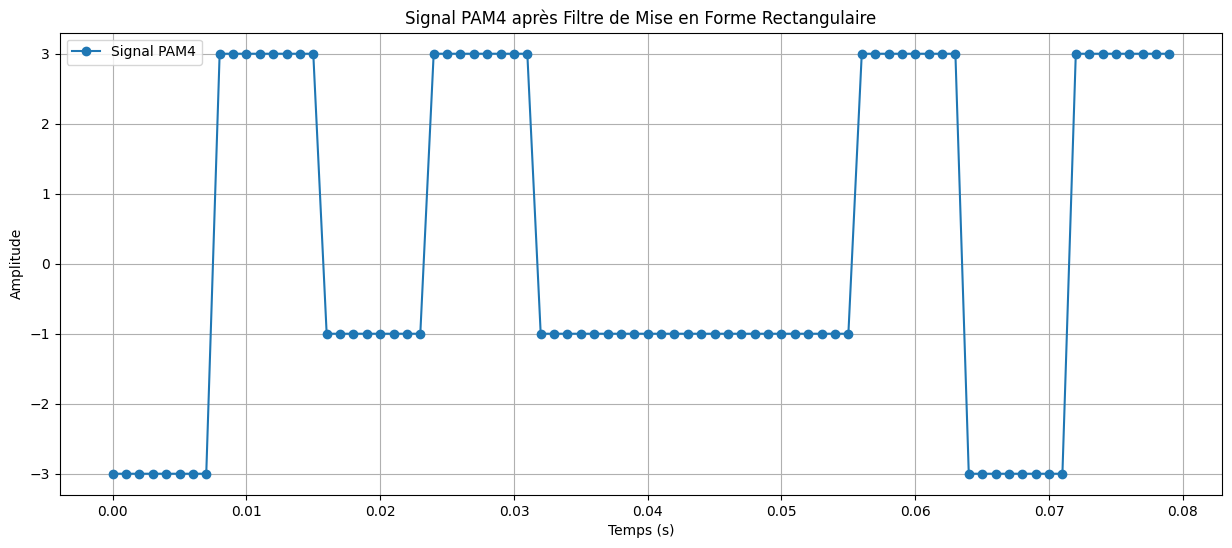

In [5]:
n_bits  = 20
bits = Source.random(n_bits)
print("Séquence binaire aléatoire :", bits)

MynewModem = Modem('PAM', 4, bits=bits)
MyMapp = MynewModem.mapping(3)
print("Mapping de la séquence binaire :", MyMapp)

samples = MynewModem.filtre_MF(MyMapp, n_echantillons=8, filtre_type='rectangular')
print("Signal modulé filtré :", samples)

T_s = 1e-3  # 1 ms
n_echantillons_par_symbole = 8
total_samples = len(samples)
t = np.linspace(0, total_samples * T_s, total_samples, endpoint=False)
plt.figure(figsize=(15, 6))
plt.plot(t, samples, marker='o', linestyle='-', label='Signal PAM4')
plt.title('Signal PAM4 après Filtre de Mise en Forme Rectangulaire')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()


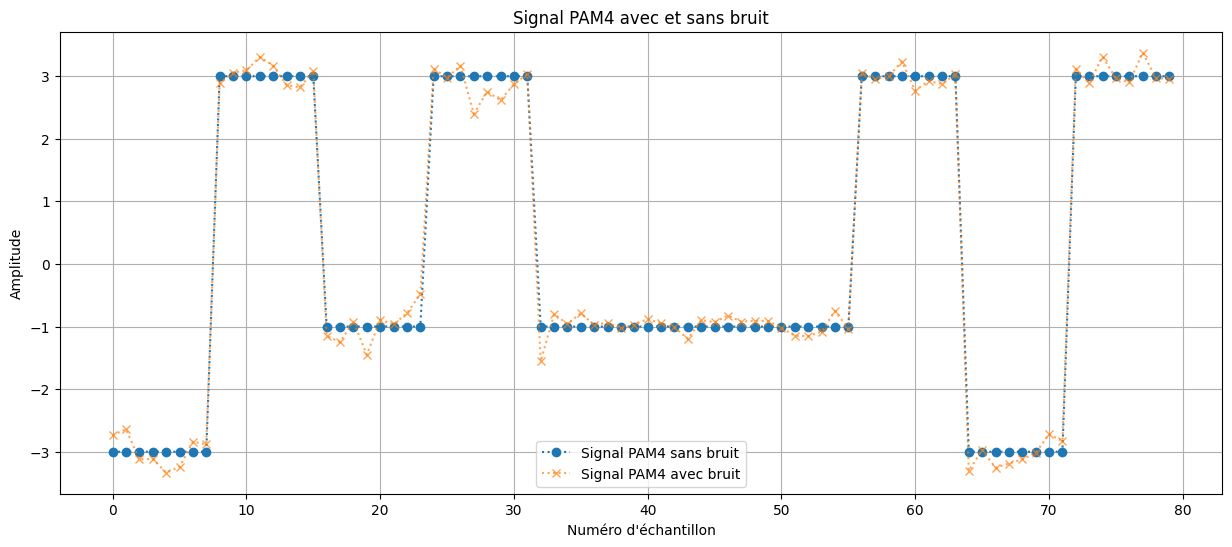

In [8]:
samples_with_noise = Canal.awgn(samples, 0, 0.2)

total_samples = len(samples)

# Créer un vecteur d'échantillons pour l'axe des abscisses
n = np.arange(total_samples)

# Afficher le signal PAM et le signal PAM bruité
plt.figure(figsize=(15, 6))
plt.plot(n, samples, marker='o', linestyle=':', label='Signal PAM4 sans bruit')
plt.plot(n, samples_with_noise, marker='x', linestyle=':', label='Signal PAM4 avec bruit', alpha=0.7)
plt.title('Signal PAM4 avec et sans bruit')
plt.xlabel('Numéro d\'échantillon')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

